<a href="https://colab.research.google.com/github/lenganhoang/Text-Classification/blob/master/Question_of_TF_certi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Question 1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)

In [ ]:
x=xs.reshape(-1,1)
y=ys.reshape(-1,1)

In [ ]:
x.shape, y.shape

((6, 1), (6, 1))

In [ ]:
# YOUR CODE HERE
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_dim=1, activation = 'linear')
])
model.compile(
    optimizer=tf.optimizers.Adam(0.01),
    loss='mse')

In [ ]:
model.fit(x,y,epochs=1000, batch_size=1,verbose=0)

In [ ]:
model.save('/content/gdrive/MyDrive/TF certi/question1.h5')

In [ ]:
model.predict([[10]])

array([[11.]], dtype=float32)

## Question 2:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# YOUR CODE HERE
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            min_delta=1e-4,
            patience=3,
            verbose=1
        ),
        ModelCheckpoint(
            filepath='mymodel.h5',
            monitor='val_accuracy',
            mode='max',
            save_best_only=True,
            save_weights_only=False,
            verbose=1
        )
    ]

model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
        train_images,
        train_labels,
        batch_size=128,
        epochs=20,
        verbose=1,
        validation_data=(test_images, test_labels),
        callbacks=callbacks
)

Epoch 1/20
460/469 [============================>.] - ETA: 0s - loss: 0.6565 - accuracy: 0.7720
Epoch 1: val_accuracy improved from -inf to 0.82970, saving model to mymodel.h5
469/469 [==============================] - 3s 4ms/step - loss: 0.6535 - accuracy: 0.7729 - val_loss: 0.4770 - val_accuracy: 0.8297
Epoch 2/20
454/469 [============================>.] - ETA: 0s - loss: 0.4560 - accuracy: 0.8398
Epoch 2: val_accuracy improved from 0.82970 to 0.84730, saving model to mymodel.h5
469/469 [==============================] - 2s 4ms/step - loss: 0.4552 - accuracy: 0.8400 - val_loss: 0.4297 - val_accuracy: 0.8473
Epoch 3/20
457/469 [============================>.] - ETA: 0s - loss: 0.4137 - accuracy: 0.8524
Epoch 3: val_accuracy improved from 0.84730 to 0.85500, saving model to mymodel.h5
469/469 [==============================] - 2s 4ms/step - loss: 0.4137 - accuracy: 0.8523 - val_loss: 0.4040 - val_accuracy: 0.8550
Epoch 4/20
462/469 [============================>.] - ETA: 0s - loss: 0.3

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_2=model_2.fit(train_images,train_labels,validation_data=(test_images,test_labels), verbose=1, epochs= 50 ,batch_size=1024, callbacks=[callback])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 [==============================] - 41s 690ms/step - loss: 0.9999 - accuracy: 0.6495 - val_loss: 0.5810 - val_accuracy: 0.7815
Epoch 2/50
59/59 [==============================] - 41s 690ms/step - loss: 0.5498 - accuracy: 0.7979 - val_loss: 0.4865 - val_accuracy: 0.8190
Epoch 3/50
59/59 [==============================] - 41s 694ms/step - loss: 0.4702 - accuracy: 0.8296 - val_loss: 0.4350 - val_accuracy: 0.8413
Epoch 4/50
59/59 [==============================] - 41s 698ms/step - loss: 0.4254 - accuracy: 0.8475 - val_loss: 0.3998 - val_accuracy: 0.8537
Epoch 5/50
59/59 [==============================] - 41s 699ms/step - loss: 0.3950 - accuracy: 0.8577 - val_loss: 0.3760 - val_accuracy: 0.8608
Epoch 6/50
59/59 [==============================] - 42s 711ms/step - loss: 0.3689 - accuracy: 0.8678 - val_loss: 0.3556 - val_accuracy: 0.8723
Epoch 7/50
59/59 [==============================] - 41s 692ms/step - loss: 0.3532 - accuracy: 0.8733 - val_loss: 0.3473 - val_accuracy: 0.8741
Epoch 8/50

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10 ,activation='softmax')
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.5032 - accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2489 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2410 - accurac

In [ ]:
model_2.save('/content/gdrive/MyDrive/TF certi/question2.h5')

In [ ]:
predictions = model.predict(test_images)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10 ,activation='softmax')
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_2=model_2.fit(train_images,train_labels,validation_data=(test_images,test_labels), verbose=1, epochs= 50 ,batch_size=1024, callbacks=[callback])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 [==============================] - 1s 15ms/step - loss: 0.8358 - accuracy: 0.7219 - val_loss: 0.5619 - val_accuracy: 0.8019
Epoch 2/50
59/59 [==============================] - 1s 12ms/step - loss: 0.4835 - accuracy: 0.8331 - val_loss: 0.4755 - val_accuracy: 0.8348
Epoch 3/50
59/59 [==============================] - 1s 13ms/step - loss: 0.4278 - accuracy: 0.8526 - val_loss: 0.4406 - val_accuracy: 0.8432
Epoch 4/50
59/59 [==============================] - 1s 12ms/step - loss: 0.3980 - accuracy: 0.8610 - val_loss: 0.4201 - val_accuracy: 0.8507
Epoch 5/50
59/59 [==============================] - 1s 13ms/step - loss: 0.3749 - accuracy: 0.8687 - val_loss: 0.4083 - val_accuracy: 0.8565
Epoch 6/50
59/59 [==============================] - 1s 13ms/step - loss: 0.3584 - accuracy: 0.8734 - val_loss: 0.3904 - val_accuracy: 0.8603
Epoch 7/50
59/59 [==============================] - 1s 12ms/step - loss: 0.3457 - accuracy: 0.8776 - val_loss: 0.3802 - val_accuracy: 0.8634
Epoch 8/50
59/59 [======

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3348 - accuracy: 0.8816 - 362ms/epoch - 1ms/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

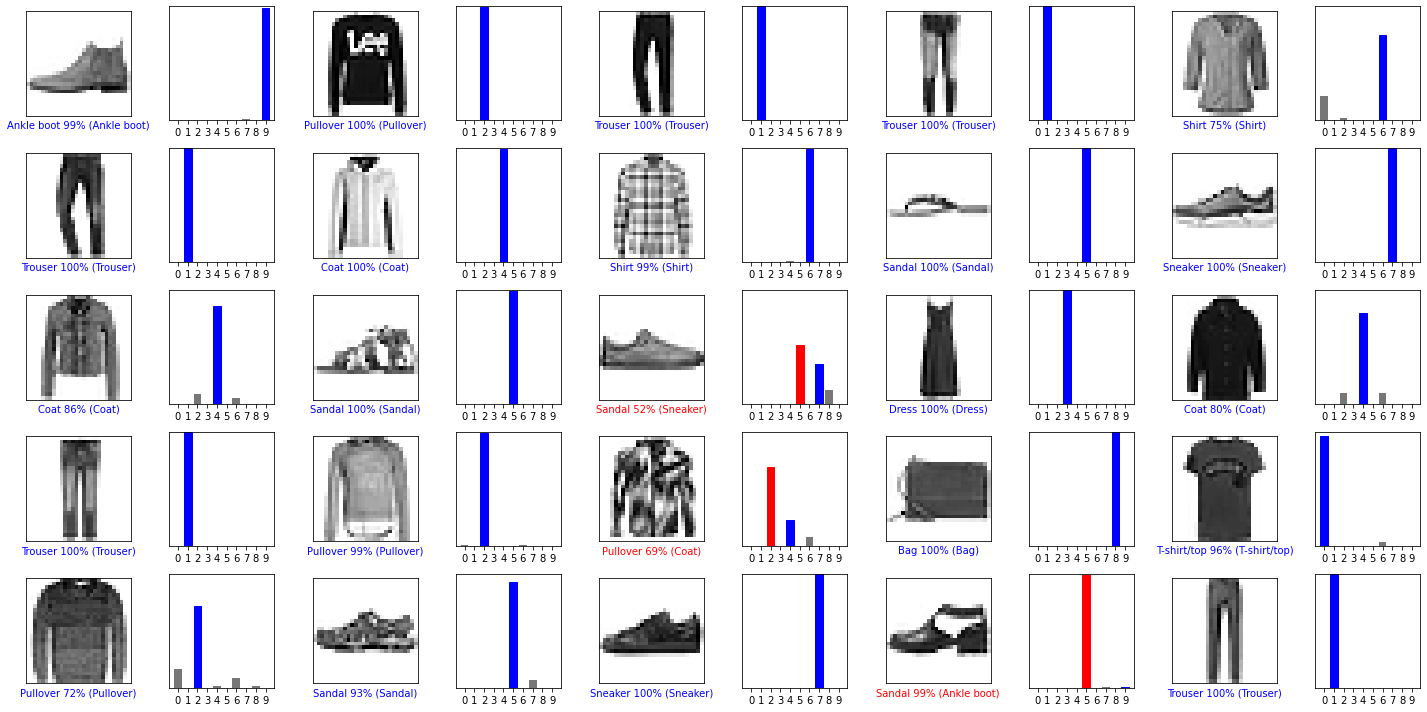

In [ ]:
import matplotlib.pyplot as plt
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

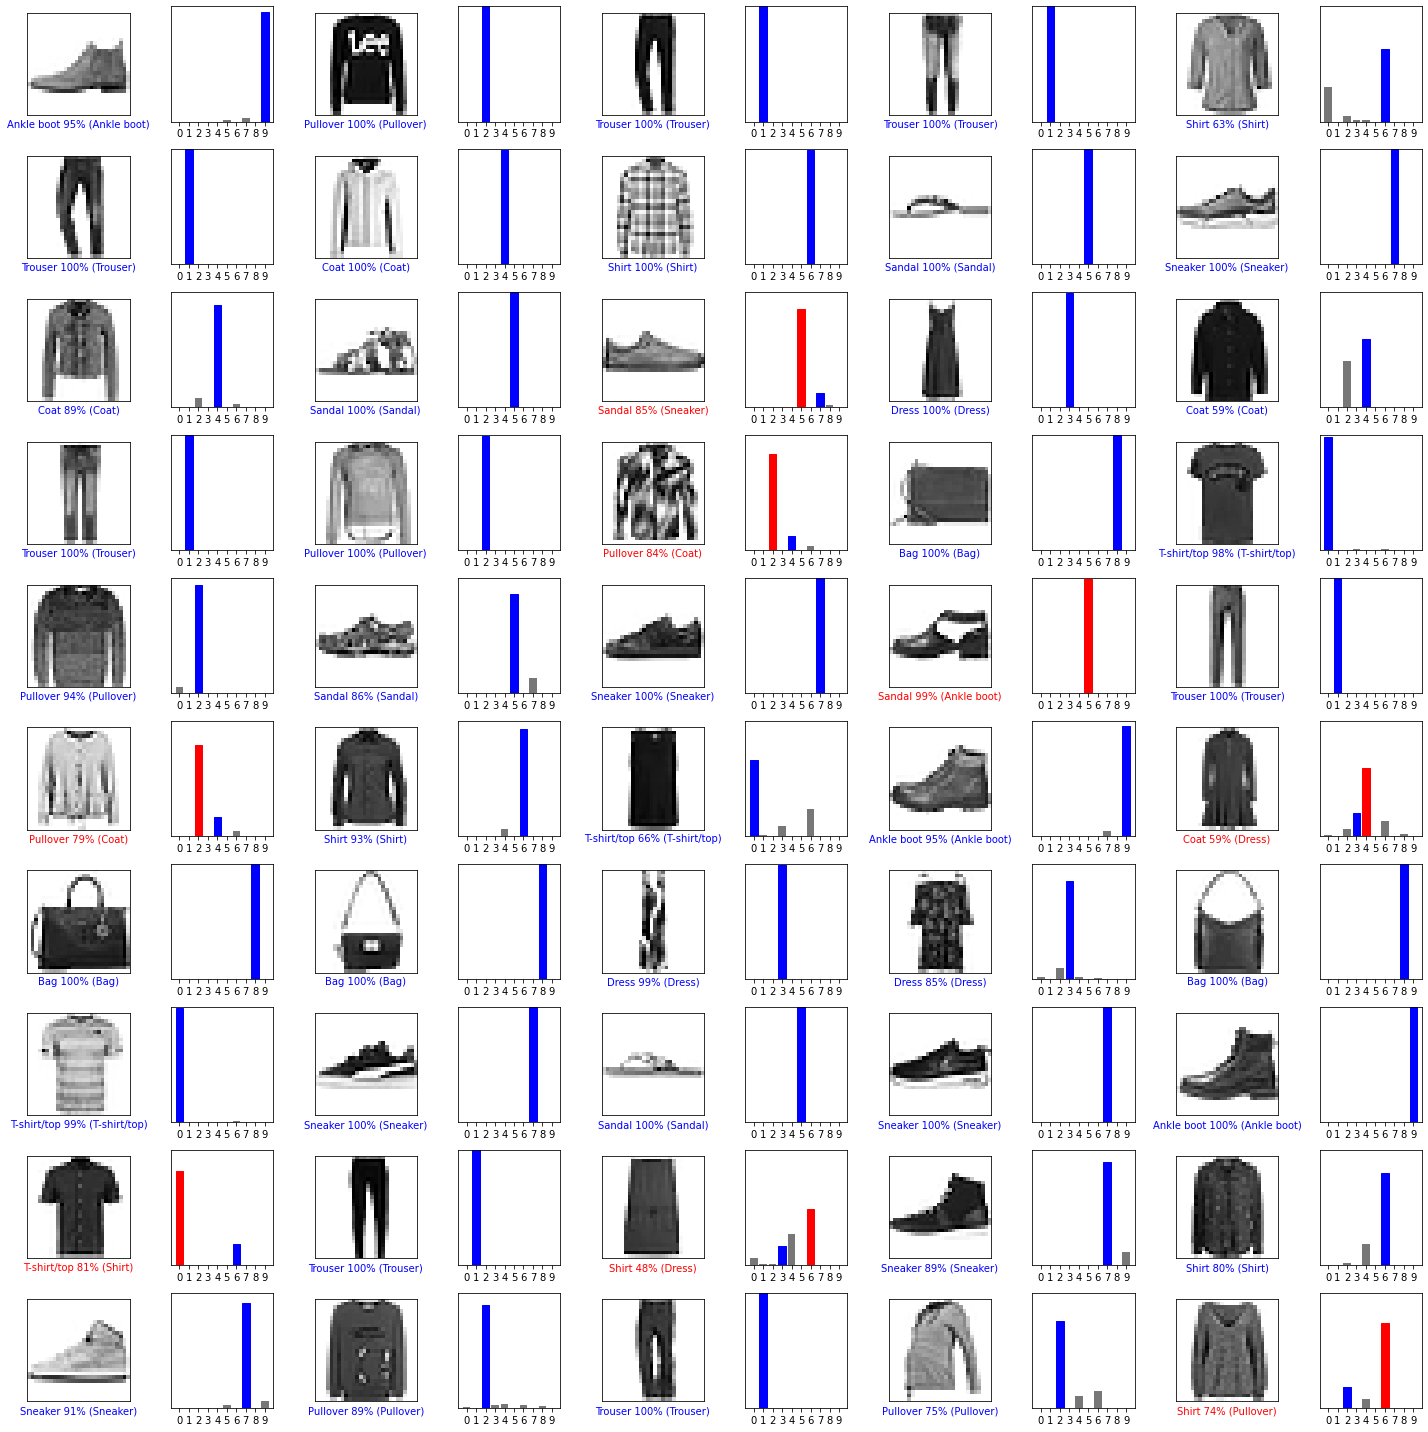

In [ ]:
import matplotlib.pyplot as plt
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Question 3

In [3]:
import urllib
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/horse-or-human/')
zip_ref.close()
urllib.request.urlretrieve(_TEST_URL, 'testdata.zip')
local_zip = 'testdata.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/testdata/')
zip_ref.close()

In [5]:
dir_train = 'tmp/horse-or-human/'
dir_test = 'tmp/testdata/'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(dir_train,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (300, 300))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( dir_test,
                                                    batch_size  = 20,
                                                    class_mode  = 'binary', 
                                                    target_size = (300, 300))



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [7]:
 #Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

--2022-06-05 01:37:39--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   138MB/s    in 0.6s    

2022-06-05 01:37:40 (138 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0         

In [8]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 17, 17, 768)


In [9]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [10]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 1027/20,
            epochs = 3,
            validation_steps = 256/20,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/3


KeyboardInterrupt: ignored

In [ ]:
model.save('/content/gdrive/MyDrive/TF certi/question3.h5')

## Question 4

In [ ]:
import json
import urllib
import pandas as pd

url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []

# YOUR CODE HERE
with open('sarcasm.json', 'r') as f:
    data = json.load(f)

for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])


In [ ]:
train_text = sentences[0:training_size]
test_text = sentences[training_size:]
train_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=vocab_size,
 output_sequence_length=max_length)
vectorize_layer.adapt(train_text)
def BiLSTM():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,), dtype=tf.string),
        vectorize_layer,
        tf.keras.layers.Embedding(
            vocab_size, embedding_dim, input_length=max_length,
            # Use masking to handle the variable sequence lengths
            mask_zero=True),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])
    return model

In [ ]:
model = BiLSTM()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 120)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trai

In [ ]:
num_epochs = 30
history = model.fit(train_text, train_labels, epochs=num_epochs, validation_data=(test_text, test_labels), verbose=2)

Epoch 1/30
625/625 - 73s - loss: 0.6695 - accuracy: 0.5603 - val_loss: 0.6011 - val_accuracy: 0.5633 - 73s/epoch - 118ms/step
Epoch 2/30
625/625 - 62s - loss: 0.4792 - accuracy: 0.7003 - val_loss: 0.4329 - val_accuracy: 0.7696 - 62s/epoch - 99ms/step
Epoch 3/30
625/625 - 62s - loss: 0.3929 - accuracy: 0.7962 - val_loss: 0.4090 - val_accuracy: 0.7958 - 62s/epoch - 100ms/step
Epoch 4/30
625/625 - 62s - loss: 0.3670 - accuracy: 0.8138 - val_loss: 0.3973 - val_accuracy: 0.8050 - 62s/epoch - 100ms/step
Epoch 5/30
625/625 - 62s - loss: 0.3526 - accuracy: 0.8283 - val_loss: 0.3924 - val_accuracy: 0.8019 - 62s/epoch - 100ms/step
Epoch 6/30
625/625 - 62s - loss: 0.3436 - accuracy: 0.8375 - val_loss: 0.3890 - val_accuracy: 0.8155 - 62s/epoch - 100ms/step
Epoch 7/30
625/625 - 62s - loss: 0.3382 - accuracy: 0.8396 - val_loss: 0.3892 - val_accuracy: 0.8103 - 62s/epoch - 99ms/step
Epoch 8/30
625/625 - 62s - loss: 0.3335 - accuracy: 0.8429 - val_loss: 0.3940 - val_accuracy: 0.8253 - 62s/epoch - 99ms/

In [ ]:
model.save('/content/gdrive/MyDrive/TF certi/question4.h5')

NotImplementedError: ignored

In [12]:
!pip install tensorflow==2.7.0
!pip install tensorflow-datasets==4.4.0 
!pip install Pillow==8.4.0 
!pip install pandas==1.3.4 
!pip install numpy==1.21.4 
!pip install scipy==1.7.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 665.5 MB 293 kB/s
     |████████████████████████████████| 463 kB 8.6 MB/s 
     |████████████████████████████████| 1.3 MB 46.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 8.8 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 5.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 8.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import urllib
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [14]:
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/horse-or-human/')
zip_ref.close()
urllib.request.urlretrieve(_TEST_URL, 'testdata.zip')
local_zip = 'testdata.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/testdata/')
zip_ref.close()

In [15]:
dir_train = 'tmp/horse-or-human/'
dir_test = 'tmp/testdata/'

In [16]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input

In [17]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   horizontal_flip=True, 
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=dir_train, 
                                                    target_size=(300,300),
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    shuffle=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = train_datagen.flow_from_directory(directory=dir_test,
                                                  target_size=(300,300), 
                                                  class_mode='binary', 
                                                  batch_size=32,
                                                  shuffle=True)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
efn = EfficientNetB7(weights="imagenet", 
                     include_top = False, 
                     input_shape = (300,300,3))
for layer in efn.layers:
    layer.trainable = False

model = tf.keras.Sequential()
model.add(efn)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

258088960/258076736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 10, 10, 2560)     64097687  
                                                                 
 flatten_1 (Flatten)         (None, 256000)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 256001    
                                                                 
Total params: 64,353,688
Trainable params: 256,001
Non-trainable params: 64,097,687
_________________________________________________________________


In [19]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics ="accuracy")

In [20]:
patient = 4
save_path = '/content/gdrive/MyDrive/TF certi/model3.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]


In [21]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=50,
                    validation_data=val_generator,
                    callbacks=callbacks_list)

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9718 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f770619def0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_accuracy improved from -inf to 0.98438, saving model to /

KeyboardInterrupt: ignored

In [ ]:

# ==============================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative to its
# difficulty. So your Category 1 question will score significantly less than
# your Category 5 question.
#
# WARNING: Do not use lambda layers in your model, they are not supported
# on the grading infrastructure. You do not need them to solve the question.
#
# WARNING: If you are using the GRU layer, it is advised not to use the
# recurrent_dropout argument (you can alternatively set it to 0),
# since it has not been implemented in the cuDNN kernel and may
# result in much longer training times.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ==============================================================================
#
# TIME SERIES QUESTION
#
# Build and train a neural network to predict time indexed variables of
# the multivariate house hold electric power consumption time series dataset.
# Using a window of past 24 observations of the 7 variables, the model
# should be trained to predict the next 24 observations of the 7 variables.
#
# ==============================================================================
#
# ABOUT THE DATASET
#
# Original Source:
# https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
#
# The original Individual House Hold Electric Power Consumption Dataset
# has Measurements of electric power consumption in one household with
# a one-minute sampling rate over a period of almost 4 years.
#
# Different electrical quantities and some sub-metering values are available.
#
# For the purpose of the examination we have provided a subset containing
# the data for the first 60 days in the dataset. We have also cleaned the
# dataset beforehand to remove missing values. The dataset is provided as a
# CSV file in the project.
#
# The dataset has a total of 7 features ordered by time.
# ==============================================================================
#
# INSTRUCTIONS
#
# Complete the code in following functions:
# 1. solution_model()
#
# Your code will fail to be graded if the following criteria are not met:
#
# 1. Model input shape must be (BATCH_SIZE, N_PAST = 24, N_FEATURES = 7),
#    since the testing infrastructure expects a window of past N_PAST = 24
#    observations of the 7 features to predict the next N_FUTURE = 24
#    observations of the same features.
#
# 2. Model output shape must be (BATCH_SIZE, N_FUTURE = 24, N_FEATURES = 7)
#
# 3. The last layer of your model must be a Dense layer with 7 neurons since
#    the model is expected to predict observations of 7 features.
#
# 4. Don't change the values of the following constants:
#    SPLIT_TIME, N_FEATURES, BATCH_SIZE, N_PAST, N_FUTURE, SHIFT, in
#    solution_model() (See code for additional note on BATCH_SIZE).
#
# 5. Code for normalizing the data is provided - don't change it.
#    Changing the normalizing code will affect your score.
#
# 6. Code for converting the dataset into windows is provided - don't change it.
#    Changing the windowing code will affect your score.
#
# 7. Code for setting the seed is provided - don't change it.
#
# HINT: If you follow all the rules mentioned above and throughout this
# question while training your neural network, there is a possibility that a
# validation MAE of approximately 0.055 or less on the normalized validation
# dataset may fetch you top marks.


import urllib
import zipfile

import pandas as pd
import tensorflow as tf


# This function downloads and extracts the dataset to the directory that
# contains this file.
# DO NOT CHANGE THIS CODE
# (unless you need to change https to http)
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/household_power.zip'
    urllib.request.urlretrieve(url, 'household_power.zip')
    with zipfile.ZipFile('household_power.zip', 'r') as zip_ref:
        zip_ref.extractall()


# This function normalizes the dataset using min max scaling.
# DO NOT CHANGE THIS CODE
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data


# This function is used to map the time series dataset into windows of
# features and respective targets, to prepare it for training and
# validation. First element of the first window will be the first element of
# the dataset. Consecutive windows are constructed by shifting
# the starting position of the first window forward, one at a time (indicated
# by shift=1). For a window of n_past number of observations of all the time
# indexed variables in the dataset, the target for the window
# is the next n_future number of observations of these variables, after the
# end of the window.

# DO NOT CHANGE THIS CODE
def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)



# This function loads the data from CSV file, normalizes the data and
# splits the dataset into train and validation data. It also uses
# windowed_dataset() to split the data into windows of observations and
# targets. Finally it defines, compiles and trains a neural network. This
# function returns the final trained model.

# COMPLETE THE CODE IN THIS FUNCTION
def solution_model():
    # Downloads and extracts the dataset to the directory that
    # contains this file.
    download_and_extract_data()
    # Reads the dataset from the CSV.
    df = pd.read_csv('household_power_consumption.csv', sep=',',
                     infer_datetime_format=True, index_col='datetime', header=0)

    # Number of features in the dataset. We use all features as predictors to
    # predict all features at future time steps.
    N_FEATURES = len(df.columns) # DO NOT CHANGE THIS

    # Normalizes the data
    data = df.values
    data = normalize_series(data, data.min(axis=0), data.max(axis=0))

    # Splits the data into training and validation sets.
    SPLIT_TIME = int(len(data) * 0.5) # DO NOT CHANGE THIS
    x_train = data[:SPLIT_TIME]
    x_valid = data[SPLIT_TIME:]

    # DO NOT CHANGE THIS CODE
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)

    # DO NOT CHANGE BATCH_SIZE IF YOU ARE USING STATEFUL LSTM/RNN/GRU.
    # THE TEST WILL FAIL TO GRADE YOUR SCORE IN SUCH CASES.
    # In other cases, it is advised not to change the batch size since it
    # might affect your final scores. While setting it to a lower size
    # might not do any harm, higher sizes might affect your scores.
    BATCH_SIZE = 32  # ADVISED NOT TO CHANGE THIS

    # DO NOT CHANGE N_PAST, N_FUTURE, SHIFT. The tests will fail to run
    # on the server.
    # Number of past time steps based on which future observations should be
    # predicted
    N_PAST = 24  # DO NOT CHANGE THIS

    # Number of future time steps which are to be predicted.
    N_FUTURE = 24  # DO NOT CHANGE THIS

    # By how many positions the window slides to create a new window
    # of observations.
    SHIFT = 1  # DO NOT CHANGE THIS

    # Code to create windowed train and validation datasets.
    train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)
    valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

    # Code to define your model.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=100, kernel_size=5,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 7]),
        tf.keras.layers.LSTM(100, return_sequences=True),
        #tf.keras.layers.LSTM(60, return_sequences=True),
        #tf.keras.layers.Dense(30, activation="relu"),
        #tf.keras.layers.Dense(10, activation="relu"),
        # ADD YOUR LAYERS HERE.

        # If you don't follow the instructions in the following comments,
        # tests will fail to grade your code:
        # The input layer of your model must have an input shape of:
        # (BATCH_SIZE, N_PAST = 24, N_FEATURES = 7)
        # The model must have an output shape of:
        # (BATCH_SIZE, N_FUTURE = 24, N_FEATURES = 7).
        # Make sure that there are N_FEATURES = 7 neurons in the final dense
        # layer since the model predicts 7 features.

        # HINT: Bidirectional LSTMs may help boost your score. This is only a
        # suggestion.

        # WARNING: If you are using the GRU layer, it is advised not to use the
        # recurrent_dropout argument (you can alternatively set it to 0),
        # since it has not been implemented in the cuDNN kernel and may
        # result in much longer training times.
        tf.keras.layers.Dense(N_FEATURES)
    ])

    # Code to train and compile the model
    #optimizer =  # YOUR CODE HERE
    model.compile(
        # YOUR CODE HERE
        loss='mae', optimizer='adam'
    )
    patient = 4
    save_path = '/content/gdrive/MyDrive/TF certi/model5.h5'
    callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_loss",
                    mode="min",
                    verbose=1,
                    save_best_only=True)
    ]
    model.fit(
        # YOUR CODE HERE
        train_set, validation_data=valid_set, batch_size=1024, epochs=100, callbacks=callbacks_list
    )

    return model


# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.

if __name__ == '__main__':
    model = solution_model()
    #model.save("c5q4.h5")


# THIS CODE IS USED IN THE TESTER FOR FORECASTING. IF YOU WANT TO TEST YOUR MODEL
# BEFORE UPLOADING YOU CAN DO IT WITH THIS
#def mae(y_true, y_pred):
#    return np.mean(abs(y_true.ravel() - y_pred.ravel()))
#
#
#def model_forecast(model, series, window_size, batch_size):
#    ds = tf.data.Dataset.from_tensor_slices(series)
#    ds = ds.window(window_size, shift=1, drop_remainder=True)
#    ds = ds.flat_map(lambda w: w.batch(window_size))
#    ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
#    forecast = model.predict(ds)
#    return forecast
#

# PASS THE NORMALIZED data IN THE FOLLOWING CODE

#rnn_forecast = model_forecast(model, data, N_PAST, BATCH_SIZE)
#rnn_forecast = rnn_forecast[SPLIT_TIME - N_PAST:-1, 0, :]

#x_valid = x_valid[:rnn_forecast.shape[0]]
#result = mae(x_valid, rnn_forecast)


Epoch 1/100
   1348/Unknown - 58s 38ms/step - loss: 0.0710
Epoch 00001: val_loss improved from inf to 0.06094, saving model to /content/gdrive/MyDrive/TF certi/model5.h5
1349/1349 [==============================] - 72s 49ms/step - loss: 0.0710 - val_loss: 0.0609 - lr: 0.0010
Epoch 2/100
1347/1349 [============================>.] - ETA: 0s - loss: 0.0610
Epoch 00002: val_loss improved from 0.06094 to 0.05908, saving model to /content/gdrive/MyDrive/TF certi/model5.h5
1349/1349 [==============================] - 56s 41ms/step - loss: 0.0610 - val_loss: 0.0591 - lr: 0.0010
Epoch 3/100
1348/1349 [============================>.] - ETA: 0s - loss: 0.0591
Epoch 00003: val_loss improved from 0.05908 to 0.05802, saving model to /content/gdrive/MyDrive/TF certi/model5.h5
1349/1349 [==============================] - 55s 41ms/step - loss: 0.0591 - val_loss: 0.0580 - lr: 0.0010
Epoch 4/100
1349/1349 [==============================] - ETA: 0s - loss: 0.0584
Epoch 00004: val_loss improved from 0.0580